In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the datasets


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


In [3]:
# Load the datasets into DataFrames
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows to understand the structure
print("Customers:")
display(customers.head())

print("Products:")
display(products.head())

print("Transactions:")
display(transactions.head())


Customers:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
# Check for missing values
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

# Check data types and summary statistics
print("\nCustomers Summary:")
print(customers.info())
print(customers.describe(include='all'))

print("\nProducts Summary:")
print(products.describe(include='all'))

print("\nTransactions Summary:")
print(transactions.describe())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Customers Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID    CustomerName         Region  SignupDate
count         200             200            200         200
unique        200             200       

In [5]:
# Example: Handling missing values (if any)
customers.fillna("Unknown", inplace=True)
transactions['Price'] = transactions['Price'].fillna(transactions['Price'].mean())


<ipython-input-6-fc148bfcd5b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


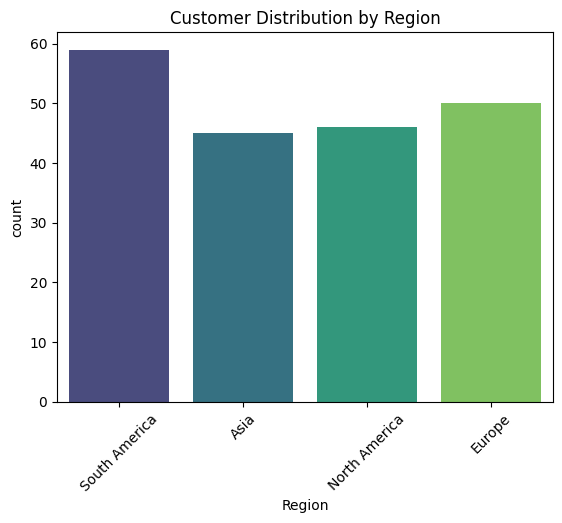

<ipython-input-6-fc148bfcd5b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='coolwarm')


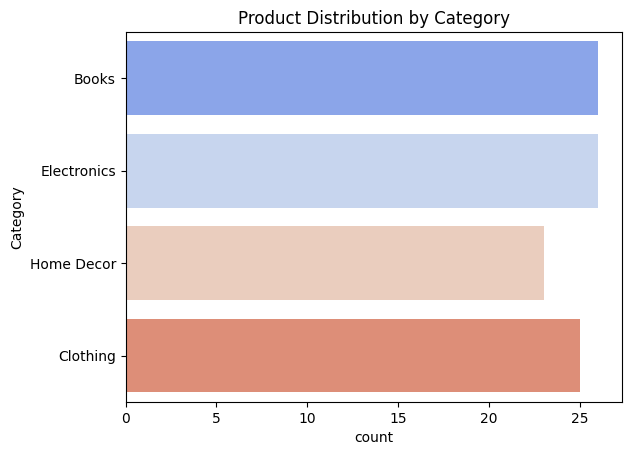

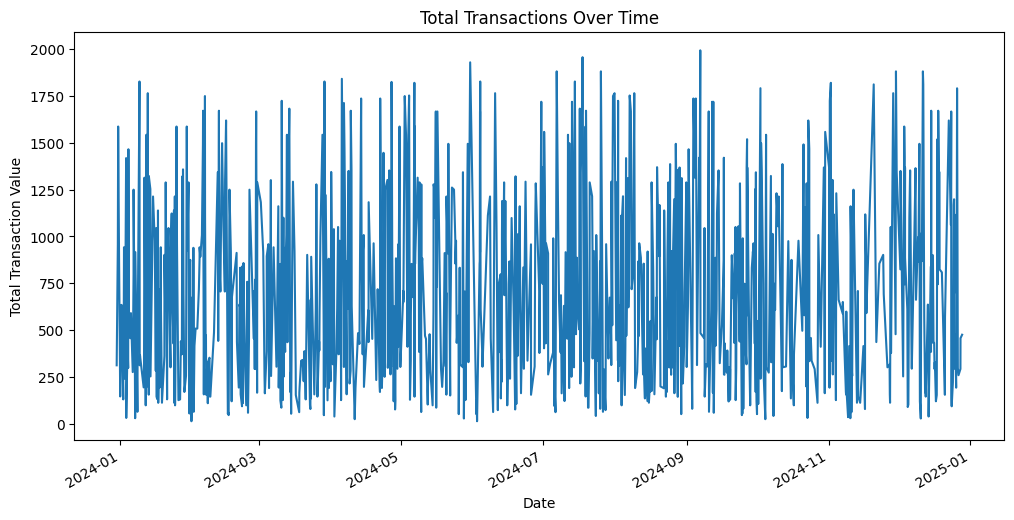

In [6]:
# Customer region distribution
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Product categories
sns.countplot(data=products, y='Category', palette='coolwarm')
plt.title("Product Distribution by Category")
plt.show()

# Total transactions over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_by_date = transactions.groupby('TransactionDate').sum()

transactions_by_date['TotalValue'].plot(figsize=(12, 6), title="Total Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Transaction Value")
plt.show()


In [7]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive to save work


Mounted at /content/drive
